In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
import pymunk
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

In [3]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9800
    space.damping = 0.99
    return space

In [4]:
top, left = (1500,500)
length = 100
n,m =5,7
def cloth(space):
    mass = 1
    radius = 25
    for y in range(top-length*(n-1),top+1,length):
        for x in range(left,left+1+length*(m-1),length):
            moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
            body = pymunk.Body(mass, moment)
            body.position = x, y
            body.start_position = Vec2d(*body.position)
            shape = pymunk.Circle(body, radius)
            shape.filter = pymunk.ShapeFilter(group=1)
            space.add(body, shape)
    for i in range(len(space.shapes)):
        if i%m !=m-1:
            spring = pymunk.DampedSpring(space.bodies[i+1], space.bodies[i], (0,0), (0,0),length, 10000,5000)
            spring.filter = pymunk.ShapeFilter(group=1)
            space.add(spring)
        if i > m-1:
            spring = pymunk.DampedSpring(space.bodies[i-m], space.bodies[i], (0,0), (0,0),length, 10000,5000)
            spring.filter = pymunk.ShapeFilter(group=1)
            space.add(spring)

In [5]:
def add_pin(space):
    body = space.bodies[-m]
    x,y = body.position
    pj = pymunk.PinJoint(space.static_body, body, (x+125, 125+y), (0,0))
    space.add(pj)

In [6]:
def floor(space):
    body = pymunk.Body(body_type=pymunk.Body.STATIC)
    shape = pymunk.Segment(body,(0,250),(1500,250), 5 )
    space.add(shape,body)

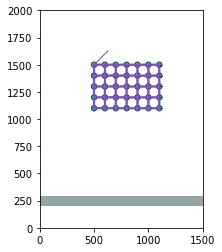

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1500), ylim=(0, 2000))
ax.set_aspect("equal")

space = setup_space()
cloth(space)
add_pin(space)
floor(space)
o = pymunk.matplotlib_util.DrawOptions(ax)
space.debug_draw(o)

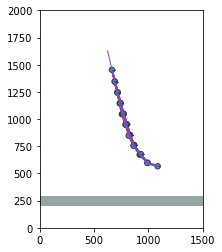

In [13]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1500), ylim=(0, 2000))
ax.set_aspect("equal")

space = setup_space()
cloth(space)
add_pin(space)
floor(space)
o = pymunk.matplotlib_util.DrawOptions(ax)

space.shapes[6].body.apply_impulse_at_local_point((-5000,10000))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    for x in range(10):
        space.step(1/50/10/4)
    ax.clear()
    ax.set_xlim(0,1500)
    ax.set_ylim(0,2000)
    space.debug_draw(o)
    return []

frames = 400
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=True)
anim.save('ClothSim.mp4')